- 비지도 학습의 목표 : 목표 변수가 존재하지 않는 데이터로부터 숨어 있는 패턴이나 구조를 찾는것
- 결과 해석이 주관적
- 분석이 어렵다
- 탐색적 데이터 분석의 한 방법으로 실행
- 범용적으로 통용되는 결과 검증 방법이 없다
- 사용예시
    - 유전체학
    - 검색엔진
    - 지식추출
    - 고객 세분화
    - 사회망 분석

- 비지도학습 분석기술
    - K-평균 군집화
    - 주성분 분석
    - 특이값 분해
    - 딥 오토 인코더

## K-평균 군집화
- 목적 : 관측값을 유사성이 높은 것끼리 묶어 다수의 그룹으로 만드는 것
- 동일 그룹 내 구성원 간의 유사성 높음
- 다른 그룹의 구성원과의 유사성 거의 없도록 하는 것
- 사례
    - 자금 세탁 방지를 위한 척도로서 이상 탐지를 통해 의심스러운 자금 흐름이나 개인을 찾아낼 수 있다.
    - 생물학에서는 유사한 패턴을 가진 유전자 그룹을 찾는 데 사용한다.
    - 마케팅 분석에서 유사한 고객 세그먼트를 찾기 위해 군집화를 사용하고 각기 다른 고객 세그먼트에 서로 다른 마케팅 전략을 활용
    
- K-평균 군집화의 비용함수 => 유클리디언 거리로 결정
<h3>$ J = \sum_{k = 1}^{K}\sum_{i\in C_{k}}^{}||x_{i} - u_{k}||^2$</h3>

## K-평균 군집화 기본 작동 원리
|점|X|Y|
|:--:|:--:|:--:|
|1|7|8|
|2|2|4|
|3|6|4|
|4|3|2|
|5|6|5|
|6|5|7|
|7|3|3|
|8|1|4|
|9|5|4|
|10|7|7|
|11|7|6|
|12|2|1|

In [98]:
# 모듈가져오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
# 데이터 프레임 만들기
data = pd.DataFrame(
    data = {
        '점' : [i for i in range(1,13)],
        'X'  : [7, 2, 6, 3, 6, 5, 3, 1, 5, 7, 7, 2],
        'Y'  : [8, 4, 4, 2, 5, 7, 3, 4, 4, 7, 6, 1],
    }
)

In [100]:
# 데이터 확인하기
data

,점,X,Y
0,1,7,8
1,2,2,4
2,3,6,4
3,4,3,2
4,5,6,5
5,6,5,7
6,7,3,3
7,8,1,4
8,9,5,4
9,10,7,7


Text(0, 0.5, 'Y')

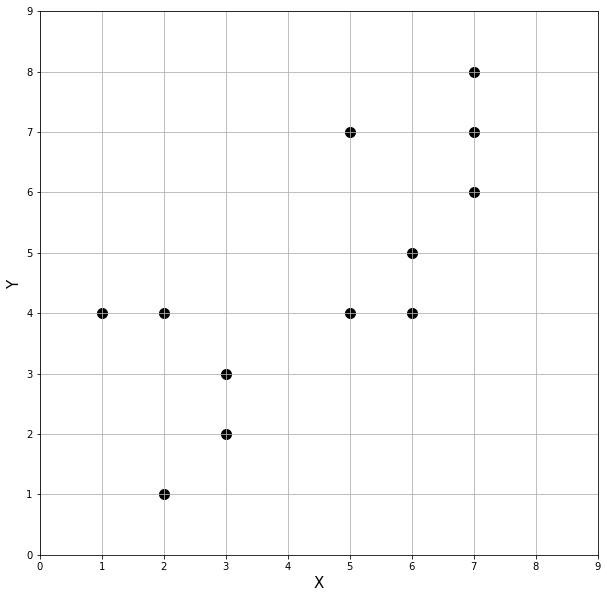

In [101]:
# 산점도 그리기
plt.figure(figsize = (10, 10))
plt.scatter(data['X'], data['Y'], marker = 'o', s = 100, c = 'black', )
plt.grid()
plt.xlim([0,9])
plt.ylim([0,9])
plt.xlabel('X', {'fontsize' : 15})
plt.ylabel('Y', {'fontsize' : 15})

In [102]:
# 임의로 두점을 골라서 클러스터의 중심으로 가정
# 점1 : (X, Y) = (7, 8) => 중심 2
# 점8 : (X, Y) = (1, 4) => 중심 1

In [103]:
# 중심좌표 구하기
center2 = float(data.loc[data['점'] == 1, 'X']), float(data.loc[data['점'] == 1, 'Y'])
center1 = float(data.loc[data['점'] == 8, 'X']), float(data.loc[data['점'] == 8, 'Y'])

In [104]:
# 중심 좌표 확인
center1, center2

((1.0, 4.0), (7.0, 8.0))

In [105]:
# 모든 점들을 중심과의 거리를 구한다.
data['dis_from_center1'] = round(np.sqrt((data['X'] - center1[0])**2 + (data['Y'] - center1[1])**2), 2)
data['dis_from_center2'] = round(np.sqrt((data['X'] - center2[0])**2 + (data['Y'] - center2[1])**2), 2)

In [106]:
data.index = data['점']

In [107]:
data.drop('점', axis = 1, inplace = True)

In [108]:
# 클러스터링
data['cluster'] = 0
data.loc[data['dis_from_center1'] < data['dis_from_center2'], 'cluster'] = 'C1'
data.loc[data['dis_from_center1'] > data['dis_from_center2'], 'cluster'] = 'C2'
data.loc[data['dis_from_center1'] == data['dis_from_center2'], 'cluster'] = '???'
data

,X,Y,dis_from_center1,dis_from_center2,cluster
점,,,,,
1,7,8,7.21,0.00,C2
2,2,4,1.00,6.40,C1
3,6,4,5.00,4.12,C2
4,3,2,2.83,7.21,C1
5,6,5,5.10,3.16,C2
6,5,7,5.00,2.24,C2
7,3,3,2.24,6.40,C1
8,1,4,0.00,7.21,C1
9,5,4,4.00,4.47,C1


In [109]:
# 새로운 중심 좌표 구하기
center1_new = round( data[data['cluster'] == 'C1']['X'].sum()/len(data[data['cluster'] == 'C1']['X'])  , 2), round( data[data['cluster'] == 'C1']['Y'].sum()/len(data[data['cluster'] == 'C1']['Y'])  , 2)
center2_new = round( data[data['cluster'] == 'C2']['X'].sum()/len(data[data['cluster'] == 'C2']['X'])  , 2), round( data[data['cluster'] == 'C2']['Y'].sum()/len(data[data['cluster'] == 'C2']['Y'])  , 2)

In [110]:
# 새로운 중십 좌표 확인하기
center1_new, center2_new

((2.67, 3.0), (6.33, 6.17))

In [111]:
# 새로운 중심 좌표로 부터 거리 구하기
# 모든 점들을 중심과의 거리를 구한다.
data['dis_from_center1_new'] = round(np.sqrt((data['X'] - center1_new[0])**2 + (data['Y'] - center1_new[1])**2), 2)
data['dis_from_center2_new'] = round(np.sqrt((data['X'] - center2_new[0])**2 + (data['Y'] - center2_new[1])**2), 2)

In [112]:
# 데이터 프레임 확인
data

,X,Y,dis_from_center1,dis_from_center2,cluster,dis_from_center1_new,dis_from_center2_new
점,,,,,,,
1,7,8,7.21,0.00,C2,6.61,1.95
2,2,4,1.00,6.40,C1,1.20,4.84
3,6,4,5.00,4.12,C2,3.48,2.19
4,3,2,2.83,7.21,C1,1.05,5.34
5,6,5,5.10,3.16,C2,3.88,1.22
6,5,7,5.00,2.24,C2,4.63,1.57
7,3,3,2.24,6.40,C1,0.33,4.60
8,1,4,0.00,7.21,C1,1.95,5.75
9,5,4,4.00,4.47,C1,2.54,2.55


In [113]:
# 컬럼명 수정 및 클러스터링
data.columns = ['X', 'Y', 'dis_from_center1', 'dis_from_center2', 'cluster1',
       'dis_from_center1_new', 'dis_from_center2_new']
# 클러스터링
data['cluster2'] = 0
data.loc[data['dis_from_center1_new'] < data['dis_from_center2_new'], 'cluster2'] = 'C1'
data.loc[data['dis_from_center1_new'] > data['dis_from_center2_new'], 'cluster2'] = 'C2'
data.loc[data['dis_from_center1_new'] == data['dis_from_center2_new'], 'cluster2'] = '???'
data

,X,Y,dis_from_center1,dis_from_center2,cluster1,dis_from_center1_new,dis_from_center2_new,cluster2
점,,,,,,,,
1,7,8,7.21,0.00,C2,6.61,1.95,C2
2,2,4,1.00,6.40,C1,1.20,4.84,C1
3,6,4,5.00,4.12,C2,3.48,2.19,C2
4,3,2,2.83,7.21,C1,1.05,5.34,C1
5,6,5,5.10,3.16,C2,3.88,1.22,C2
6,5,7,5.00,2.24,C2,4.63,1.57,C2
7,3,3,2.24,6.40,C1,0.33,4.60,C1
8,1,4,0.00,7.21,C1,1.95,5.75,C1
9,5,4,4.00,4.47,C1,2.54,2.55,C1


Text(0, 0.5, 'Y')

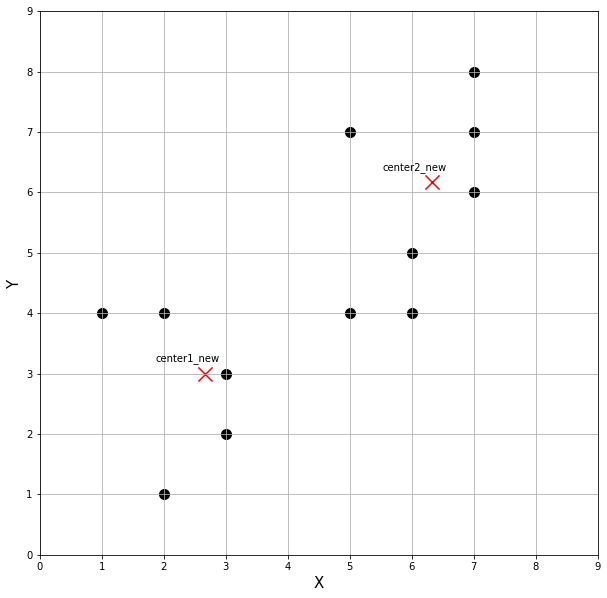

In [123]:
# 산점도 그리기
plt.figure(figsize = (10, 10))
plt.scatter(data['X'], data['Y'], marker = 'o', s = 100, c = 'black', )
plt.scatter(center1_new[0], center1_new[1], marker = 'x', s = 200, c = 'red')
plt.scatter(center2_new[0], center2_new[1], marker = 'x', s = 200, c = 'red')
plt.annotate('center1_new', (center1_new[0]-0.8, center1_new[1]+0.2))
plt.annotate('center2_new', (center2_new[0]-0.8, center2_new[1]+0.2))
plt.grid()
plt.xlim([0,9])
plt.ylim([0,9])
plt.xlabel('X', {'fontsize' : 15})
plt.ylabel('Y', {'fontsize' : 15})

In [127]:
# 모든점들에 대한 중심1과 중심2로부터 거리의 차를 계산
# 9번점은 다른 점들에 비해 거리차이가 매우 미비하다
np.abs(data['dis_from_center2_new'] - data['dis_from_center1_new']).sort_values()

점
9     0.01
3     1.29
5     2.66
6     3.06
2     3.64
8     3.80
7     4.27
4     4.29
11    4.58
12    4.63
1     4.66
10    4.82
dtype: float64

## 최적 클러스터 개수와 클러스터 평가
### 엘보 기법 : K 값의 변화에 따른 비용 함수의 값을 그래프로 그린 것
- k값이 증가하면 평균적인 왜곡이 줄어듬
- k값 증가에 따라 왜곡의 개선이 꾸준히 이루어지다가 어느 시점이 되면 개선이 급격히 저하되는 시점 발생
- k값 증가에 따른 왜곡 개선의 저하가 최대가 되는 지점을 엘보라 부른다
- 엘보 : 최적의 클러스터 수

- 실루엣 계수 : 실루엣 계수가 높을수록 클러스터의 품질이 우수
- 클러스터들이 잘 분리돼 있으면 높은 값을 갖고, 서로 겹치면 낮은 값
- (-1, 1) 사이의 값을 갖는다

<h3>$ s = \frac{(b-a)}{max(a,b)} $</h3>

a : 클러스터 내의 다른 관측값과의 평균 거리<br>
b : 가장 가까운 다른 클러스터 내에 속한 모든 관측값들과의 평균거리